### Import library

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Import data

In [2]:
# import data
data = pd.read_csv('TTH15A.csv',sep=",")
data.head()

,name,generation_time,eng_value
0,TTH15A,1476590820656718750,*NO VAL*
1,TTH15A,1476590828656718750,18.2995951417004
2,TTH15A,1476584844656718750,18.3400809716599
3,TTH15A,1476539860656718750,18.7854251012146
4,TTH15A,1476540500656718750,18.7449392712551


In [3]:
data.tail()

,name,generation_time,eng_value
361606,TTH15A,1589351704898906250,19.433198
361607,TTH15A,1589351832895000000,19.392713
361608,TTH15A,1589352216902812500,19.352227
361609,TTH15A,1589378544895000000,18.906883
361610,TTH15A,1589378360895000000,18.906883


In [4]:
print(type(data['eng_value'][1]))
print(type(data['generation_time'][1]))

<class 'str'>
<class 'numpy.int64'>


In [5]:
data['generation_time'][1]

1476590828656718750

### Convert type of data

In [6]:
# convert eng_value str type to float type
data['eng_value'] = pd.to_numeric(data['eng_value'], errors='coerce')

# convert generation_time str type to float type
data['generation_time'] = pd.to_numeric(data['generation_time'], errors='coerce')

# remove nan
data.dropna(inplace = True)
data

,name,generation_time,eng_value
1,TTH15A,1476590828656718750,18.299595
2,TTH15A,1476584844656718750,18.340081
3,TTH15A,1476539860656718750,18.785425
4,TTH15A,1476540500656718750,18.744939
5,TTH15A,1476540628656718750,18.785425
...,...,...,...
361606,TTH15A,1589351704898906250,19.433198
361607,TTH15A,1589351832895000000,19.392713
361608,TTH15A,1589352216902812500,19.352227
361609,TTH15A,1589378544895000000,18.906883


### Find start and end epoch

In [7]:
date_start = '2016-10-16 00:00:00'
date_end = '2020-05-10 00:00:00'

str_to_dt_start = datetime.datetime.strptime(date_start, '%Y-%m-%d %H:%M:%S')
str_to_dt_end = datetime.datetime.strptime(date_end, '%Y-%m-%d %H:%M:%S')

epoch_start = int(str_to_dt_start.timestamp()*1e9)
epoch_end = int(str_to_dt_end.timestamp()*1e9)

print('epoch start = ',epoch_start)
print('epoch end   = ',epoch_end)

epoch start =  1476550800000000000
epoch end   =  1589043600000000000


### Filter data between start and end epoch

In [8]:
data = data.loc[(epoch_start < data['generation_time']) &
                 (data['generation_time'] < epoch_end)]

In [9]:
data

,name,generation_time,eng_value
1,TTH15A,1476590828656718750,18.299595
2,TTH15A,1476584844656718750,18.340081
14,TTH15A,1476584940656718750,18.340081
19,TTH15A,1476551380656718750,18.704453
20,TTH15A,1476551636656718750,18.663968
...,...,...,...
360936,TTH15A,1589006616902812500,21.881720
360937,TTH15A,1589031376902812500,21.021505
360938,TTH15A,1589005464902812500,21.881720
360939,TTH15A,1589005592898906250,21.827957


### Sort Generation time

In [10]:
data.sort_values(by=['generation_time'], inplace=True)
data.tail()

/Users/gistda/opt/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,generation_time,eng_value
360931,TTH15A,1589031776902812500,20.967742
360932,TTH15A,1589031784902812500,21.021505
360933,TTH15A,1589031792902812500,20.967742
360934,TTH15A,1589031808902812500,21.021505
360935,TTH15A,1589031816902812500,20.967742


In [11]:
data.head()

,name,generation_time,eng_value
19,TTH15A,1476551380656718750,18.704453
20,TTH15A,1476551636656718750,18.663968
21,TTH15A,1476553812656718750,18.623482
22,TTH15A,1476556372660625000,18.582996
23,TTH15A,1476557396656718750,18.623482


### Reset index

In [12]:
data.reset_index(drop=True, inplace=True)

### Summary data type

In [13]:
print(data.dtypes)

name                object
generation_time      int64
eng_value          float64
dtype: object


In [14]:
data.head()

,name,generation_time,eng_value
0,TTH15A,1476551380656718750,18.704453
1,TTH15A,1476551636656718750,18.663968
2,TTH15A,1476553812656718750,18.623482
3,TTH15A,1476556372660625000,18.582996
4,TTH15A,1476557396656718750,18.623482


### Check gen_value = 0


In [15]:
num = 0
for ii in range(len(data)):
    if data['eng_value'][ii]==0:
#         print(ii)
        num+=1
print(num)

0


### Plot data

In [16]:
# #convert epoch to utc

# dt = datetime.datetime.fromtimestamp(1360287003083988472 // 1e9)
# dt

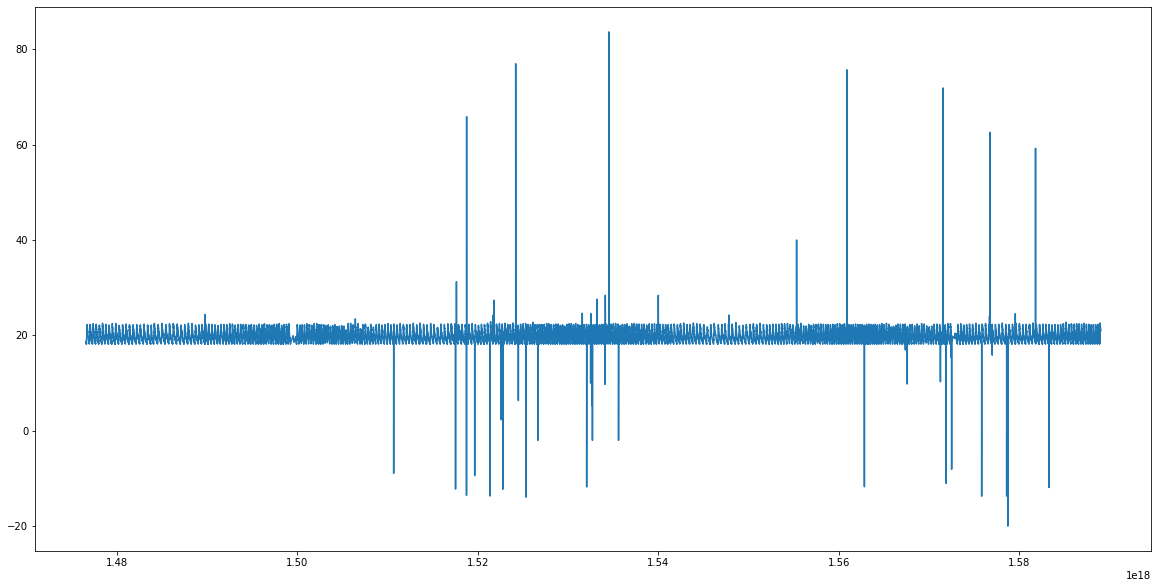

In [17]:
plt.figure(figsize=(20,10))
plt.plot(data['generation_time'], data['eng_value'])

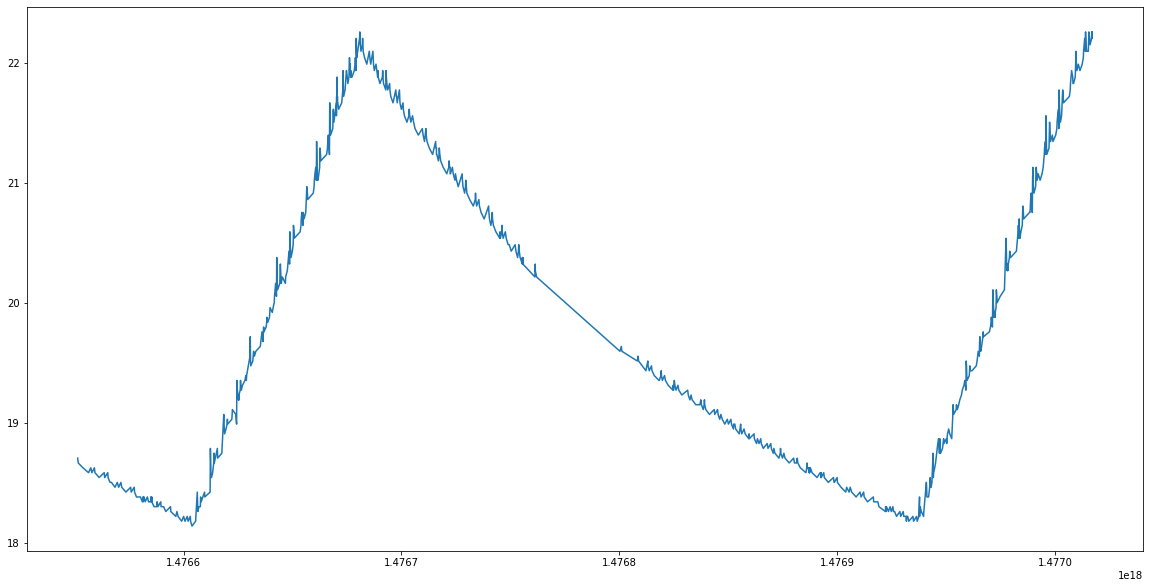

In [18]:
plt.figure(figsize=(20,10))
plt.plot(data['generation_time'][:1000], data['eng_value'][:1000])

In [19]:
# import datetime

# # start_date = data['UTC'][0]
# # end_date = data['UTC'][-1]
# # dt = datetime.datetime(start_date.year, start_date.month, start_date.day, start_date.hour, start_date.minute, start_date.second )

# dt = datetime.datetime(start_date.year, start_date.month, start_date.day, start_date.hour)
# end = datetime.datetime(end_date.year, end_date.month, end_date.day, end_date.hour , end_date.minute, end_date.second) 
# # dt = datetime.datetime(2010, 12, 1, 3, 9, 9)
# # end = datetime.datetime(2010, 12, 30, 23, 59, 59)
# # end = datetime.datetime(2020, 3, 20, 17)
# step = datetime.timedelta(minutes=60)

# result = []
# # print(dt)
# while dt < end:
#     result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
#     dt += step

### Build period data

In [20]:
# build period 


# select parameter for period type (day , hour)
# period_type = 'day'
period_type = 'hour'
period_epoch_step = 1

start_gen = data['generation_time'][0]
end_gen = data['generation_time'][len(data)-1]

# epoch time for 1 hour
epoch_hour = 3600000000000

# start and end period epoch time
start_epoch = start_gen-int(str(start_gen)[-11:])
end_epoch = end_gen-int(str(end_gen)[-11:])

period_data = []

if period_type == 'day':
    diff_epoch = 24*epoch_hour*period_epoch_step
    print('Day')
elif period_type == 'hour':
    diff_epoch = epoch_hour*period_epoch_step
    print('hour')
    
    
while start_epoch < end_epoch:
    
    period_data.append(start_epoch)
    start_epoch += diff_epoch
    
    

hour


In [21]:
     
# n = 0
# for i in range(len(result)):
#     date_new = result[i]
#     print('-----------------------------------------------------------------------------------------------------------------')
#     date_new = datetime.datetime.strptime(date_new, '%Y-%m-%d %H:%M:%S')
#     print(date_new)
# #     data_fit = data_fit.append({'date':date_new},ignore_index=True) # ใช้แจ้ง anomaly ได้
#     engvalue_tot = []  # engvalue_tot ใช้เก็บข้อมูลที่มี ชม เดียวกัน
#     for j in range(n, len(data)):
#         date_data = data['UTC'][j]
#         if date_data.year == date_new.year  and date_data.month == date_new.month and date_data.day == date_new.day and date_data.hour == date_new.hour:
#             print('n = ',n)
#             print(date_data)
#             engvalue_tot.append(data['eng_value'][j])
# #             print(engvalue)
#             n = n+1
#         else:
            
#             if engvalue_tot != []:
#                 print(date_new)
#                 print('TOT = ',engvalue_tot )
#                 average = sum(engvalue_tot) / len(engvalue_tot)
#                 print('avg = ',average)
#                 print('MAX = ', max(engvalue_tot))
#                 print('MIN = ', min(engvalue_tot))
                
#                 data_fit = data_fit.append({'date':date_new,'avg':average, 
#                                     'max':max(engvalue_tot),
#                                     'min':min(engvalue_tot)},ignore_index=True)
# #                                 data_fit = data_fit.append({'date':date_new,
# #                                     'avg':average, 
# #                                     'max':max(engvalue_tot),
# #                                     'min':min(engvalue_tot)},ignore_index=True)
#             else:
#                 engvalue_tot=0
#                 print('TOT = ',engvalue_tot )
#                 data_fit = data_fit.append({'date':date_new,'avg':0, 
#                                     'max':0,
#                                     'min':0},ignore_index=True)
#             break

### Build data frame for period time in form FEATURE

In [22]:
# Build feature

data_feature = {'date_epoch': [], 'avg': [], 'max':[], 'min':[]}
data_feature = pd.DataFrame(data=data_feature)

n = 0

for i in range(len(period_data)):
    period_new = period_data[i]
#     print(period_new)
#     print(period_new+diff_epoch)
    
    eng_val = [] # data colection for same period
    
    for j in range(n, len(data)):
    
        if ((data['generation_time'][j] >= period_new) & (data['generation_time'][j] < period_new+diff_epoch)):
            
            eng_val.append(data['eng_value'][j])
            n=n+1
            
        else:
            
            if eng_val != []:
#                 print('eng_val = ', eng_val)
#                 print('-------------------------------------------')
                average = sum(eng_val) / len(eng_val)
                
                data_feature = data_feature.append({'date_epoch':int(period_new),
                                                   'avg':average,
                                                   'max':max(eng_val),
                                                   'min':min(eng_val)}, ignore_index=True)
#                 print('eng_val = ', eng_val)
                
            else:
                eng_val=0
                data_feature = data_feature.append({'date_epoch':int(period_new),
                                                   'avg':0,
                                                   'max':0,
                                                   'min':0}, ignore_index=True)
#                 print('eng_val = ', eng_val)
                
            break

In [23]:
data_feature

,date_epoch,avg,max,min
0,1.476551e+18,18.663968,18.704453,18.623482
1,1.476555e+18,18.596491,18.623482,18.582996
2,1.476558e+18,18.582996,18.623482,18.542510
3,1.476562e+18,18.562753,18.582996,18.542510
4,1.476566e+18,18.488529,18.502024,18.461538
...,...,...,...,...
31239,1.589012e+18,21.612903,21.720430,21.505376
31240,1.589015e+18,21.471774,21.559140,21.397849
31241,1.589019e+18,21.344086,21.397849,21.290323
31242,1.589022e+18,21.263441,21.344086,21.182796


In [24]:
data_feature.to_csv('TTH15A_data_feature.csv', index=False)

### Count data avg = 0

In [25]:
num = 0
for ii in range(len(data_feature)):
    if data_feature['avg'][ii]==0:
#         print(ii)
        num+=1
print(num)

2805


### Plot data min max avg

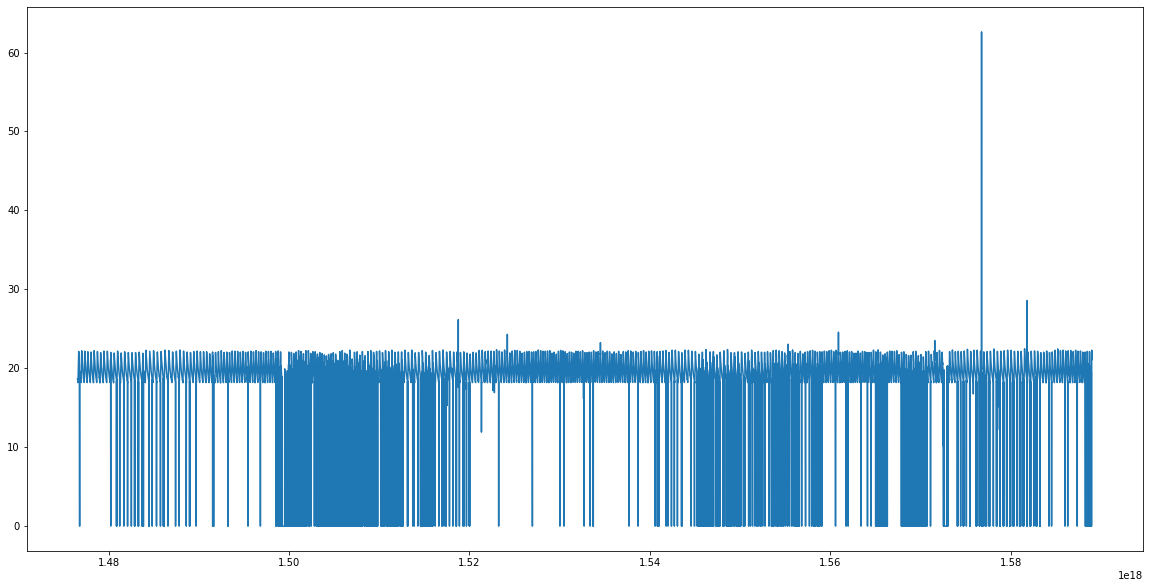

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'], data_feature['avg'])

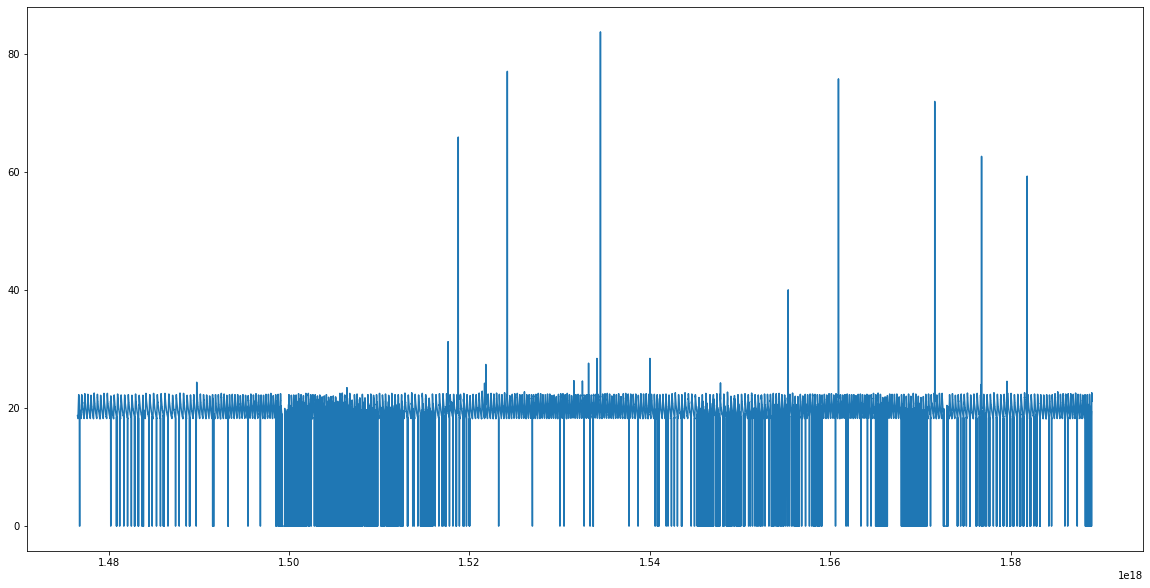

In [27]:
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'], data_feature['max'])

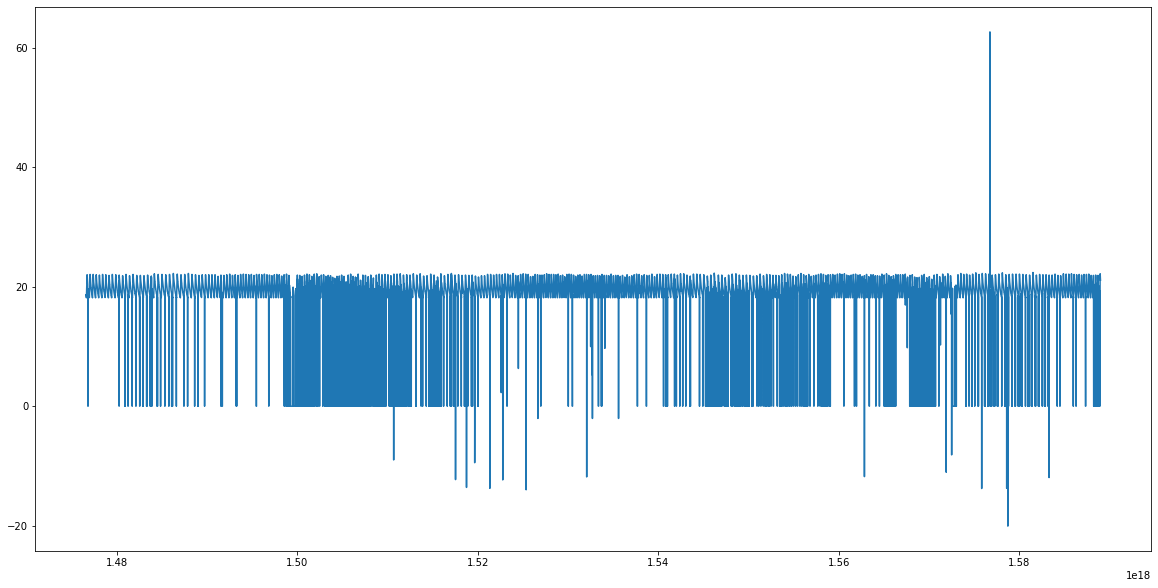

In [28]:
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'], data_feature['min'])

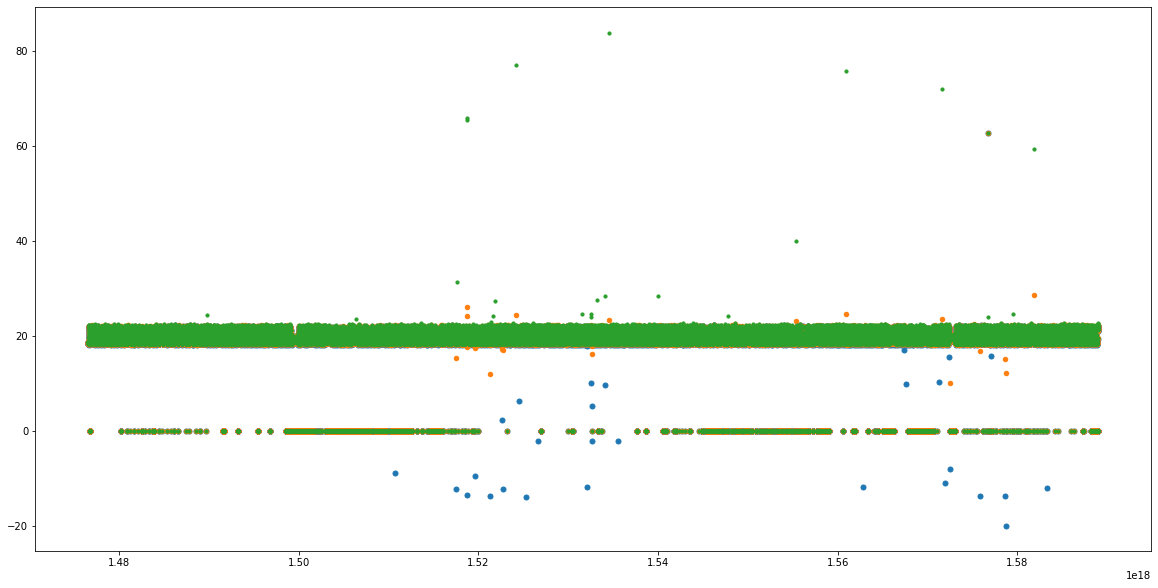

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(data_feature['date_epoch'], data_feature['min'],s=25)
plt.scatter(data_feature['date_epoch'], data_feature['avg'],s=20)
plt.scatter(data_feature['date_epoch'], data_feature['max'],s=10)
# plt.legend()
plt.show()

### Compare raw and avg data

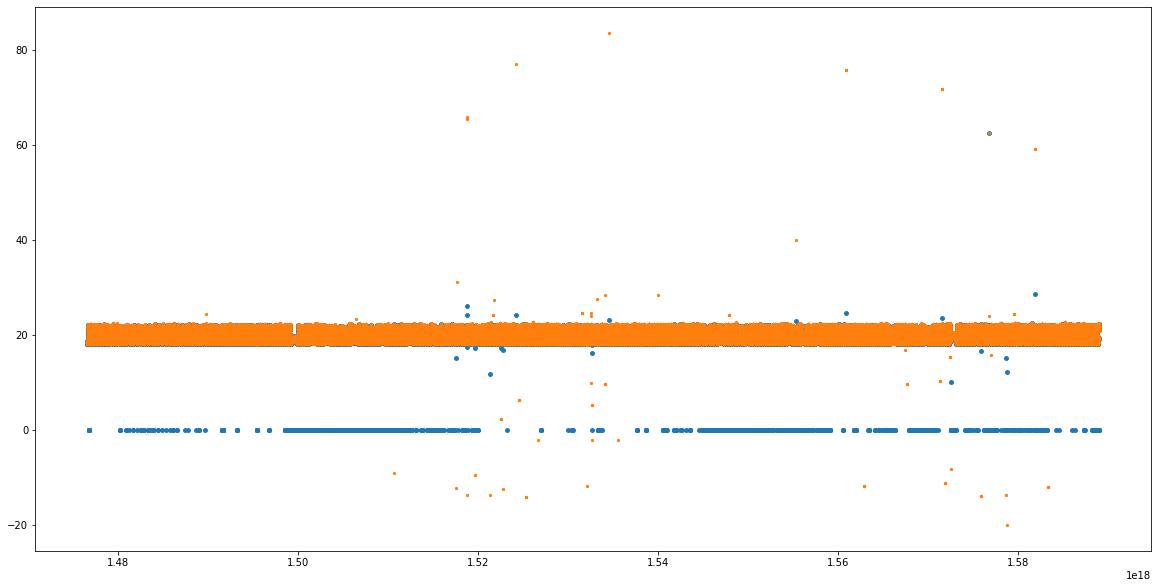

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(data_feature['date_epoch'], data_feature['avg'],s=15)
plt.scatter(data['generation_time'], data['eng_value'],s=5)

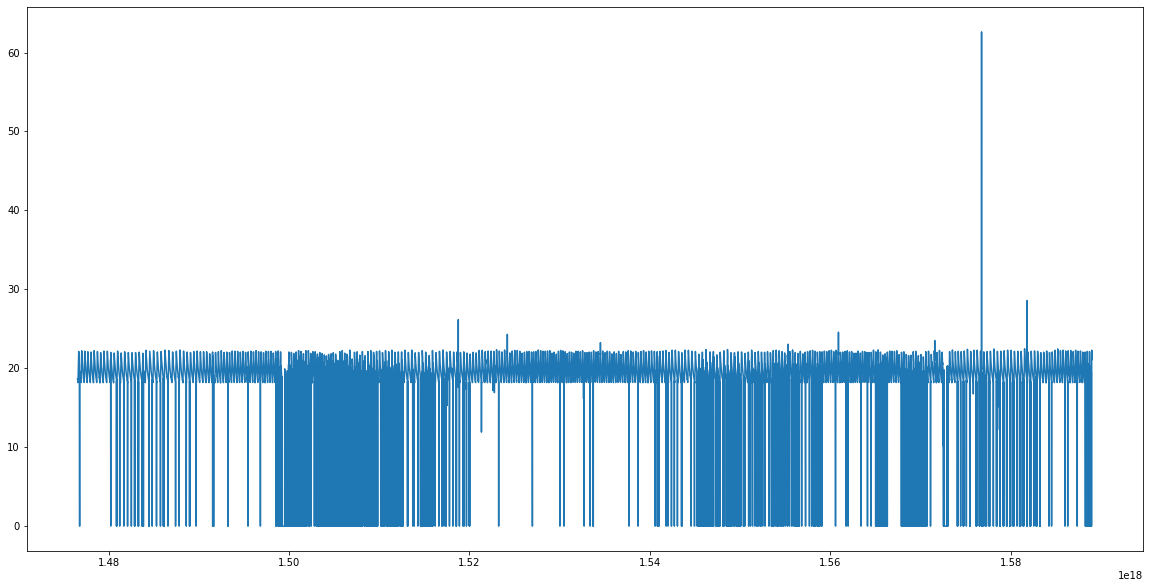

In [31]:
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'], data_feature['avg'])
# plt.scatter(data['generation_time'], data['eng_value'])

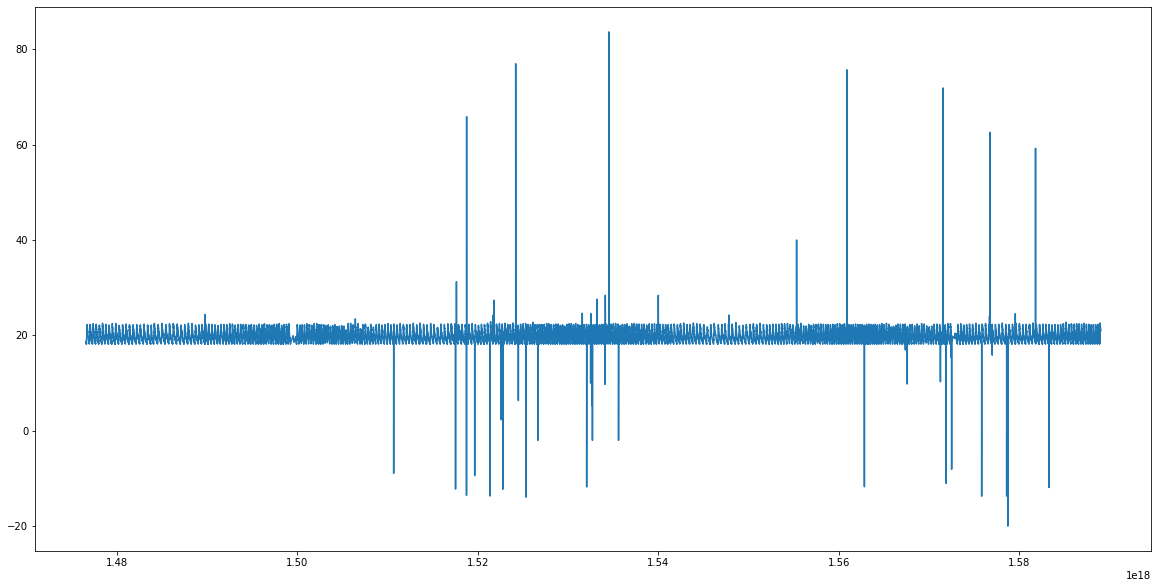

In [32]:
plt.figure(figsize=(20,10))
# plt.scatter(data_feature['date_epoch'], data_feature['avg'])
plt.plot(data['generation_time'], data['eng_value'])

# Data Analize

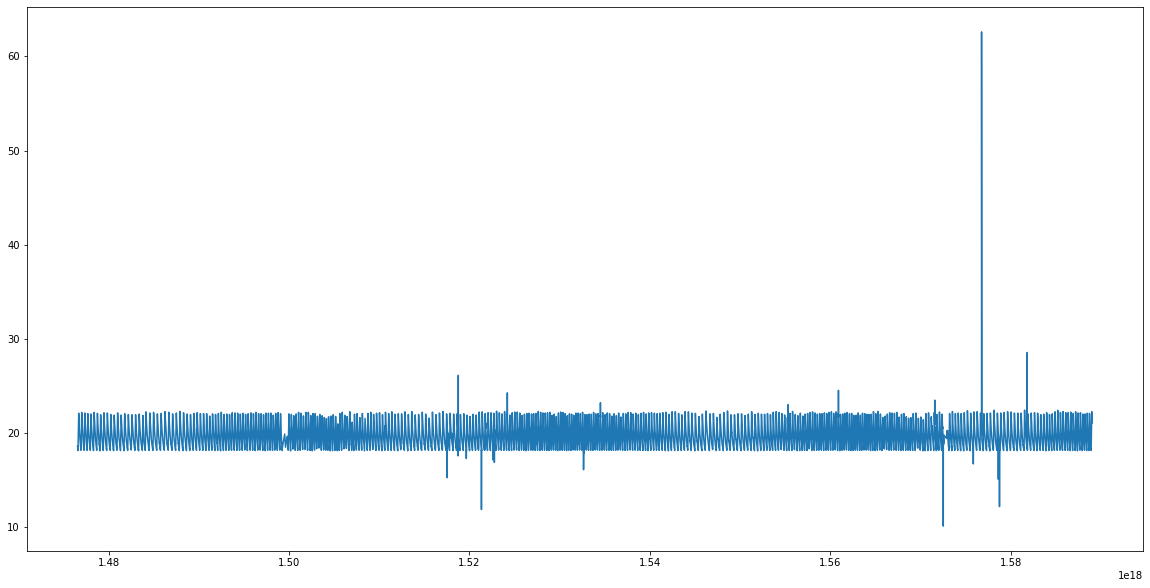

In [33]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['date_epoch'] ,data_feature[data_feature['avg']!=0]['avg'])

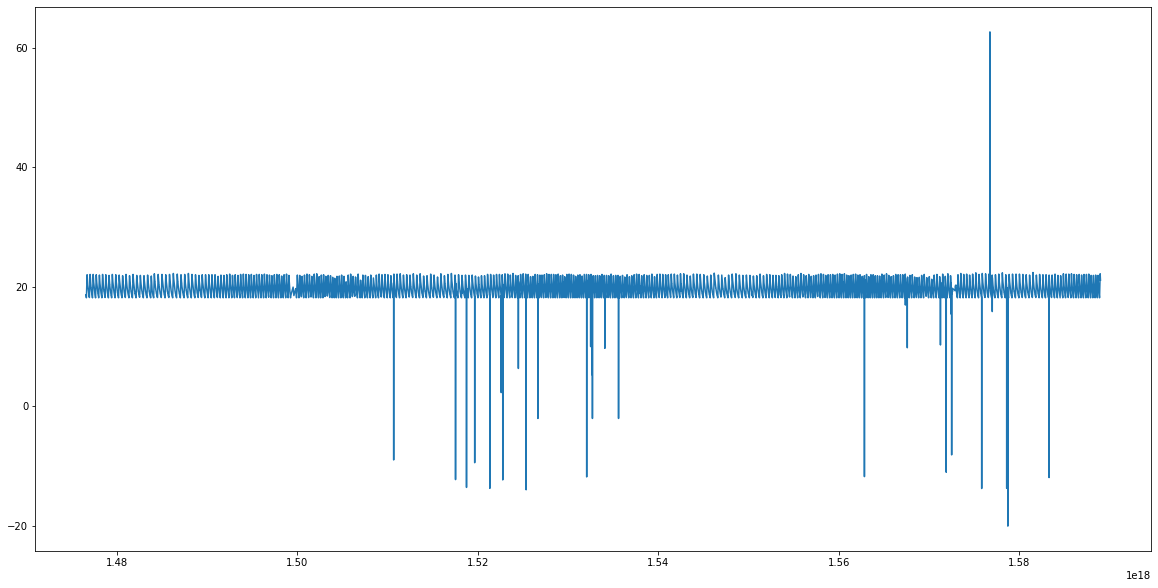

In [34]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['date_epoch'] ,data_feature[data_feature['avg']!=0]['min'])

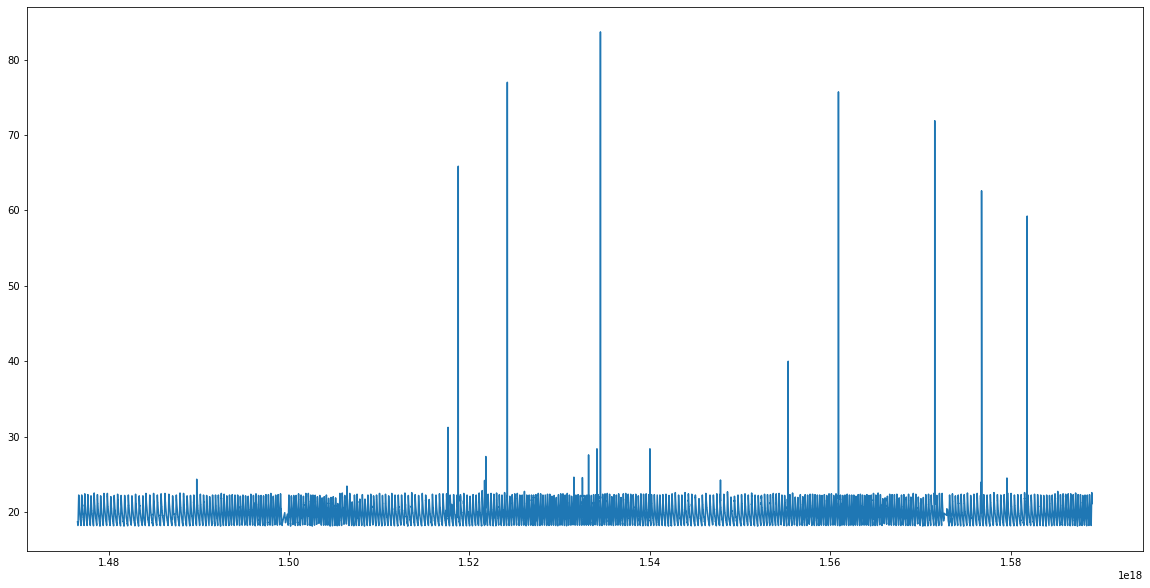

In [35]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['date_epoch'] ,data_feature[data_feature['avg']!=0]['max'])

In [36]:
uu

NameError: name 'uu' is not defined

### Pair plot

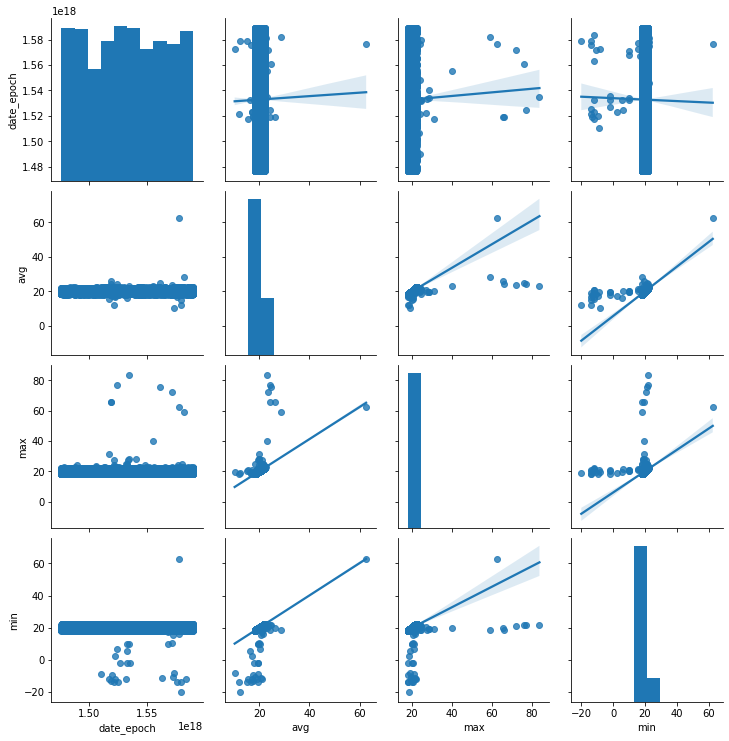

In [37]:
import seaborn as sns


# plt.figure(figsize=(20,20))
sns.pairplot(data_feature[data_feature['avg']!=0], kind='reg')


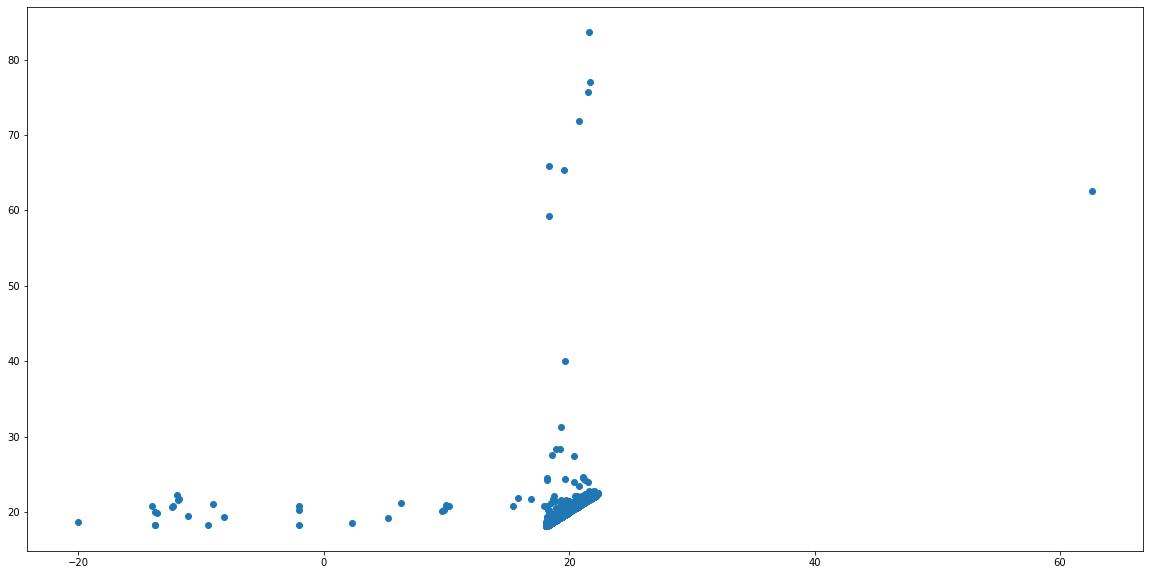

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(data_feature[data_feature['avg']!=0]['min'] ,data_feature[data_feature['avg']!=0]['max'])

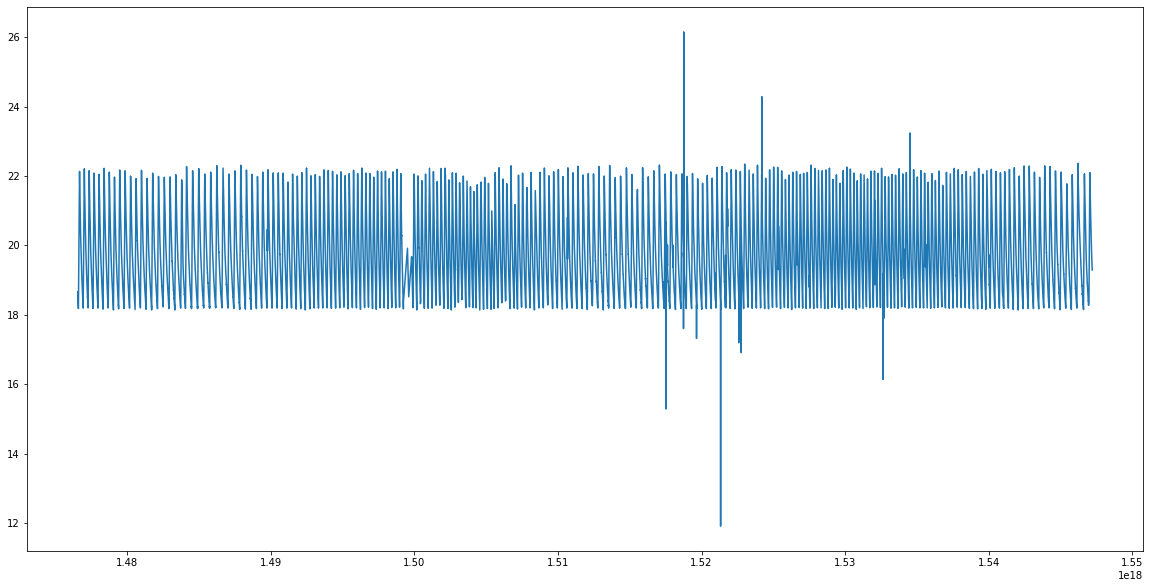

In [39]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['date_epoch'][:18000] ,data_feature[data_feature['avg']!=0]['avg'][:18000])

In [ ]:
data_feature[data_feature['avg']!=0]['avg'][:5000].std(axis = 0, skipna = True)

In [ ]:
# period

s_period = 14
e_period = 95

print('Period = ',e_period-s_period)
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['date_epoch'][s_period:e_period] ,
         data_feature[data_feature['avg']!=0]['avg'][s_period:e_period])

### Find missing of data feature mean

In [ ]:
s_period = 14
e_period = 7000

print('Period = ',e_period-s_period)
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'][s_period:e_period] ,
         data_feature['avg'][s_period:e_period])

In [ ]:
s_period = 7000
e_period = 20000

print('Period = ',e_period-s_period)
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'][s_period:e_period] ,
         data_feature['avg'][s_period:e_period])

In [ ]:
print(data_feature[data_feature['avg']==0][:10],'\n')
print('-----------------------------------------------')

print('size of data feature = ',len(data_feature))
print('% of loss = ',len(data_feature['avg'].isnull())/len(data_feature)*100)

In [ ]:
s_period = 106
e_period = 106+97+94+97+98+100+101+100+104+107
#1000

print('Period = ',e_period-s_period)
plt.figure(figsize=(20,10))
plt.plot(data_feature['date_epoch'][s_period:e_period] ,
         data_feature['avg'][s_period:e_period])
# plt.figure()
# x = data_feature[data_feature['date_epoch'][0]]+106
# plt.axvline(x=x)
# plt.axvline(x=1.476771e+18)
plt.show()

In [ ]:
(97+94+97+98+100+101+100+104+107)/9

# Decomposition

https://www.pythonforfinance.net/2019/07/22/time-series-decomposition-prediction-in-python/

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# data.to_csv('TTH15A_UTC.csv', index=False)

In [ ]:
plt.figure(figsize=(20,10))
# plt.plot(data_feature[data_feature['avg']!=0]['avg'])
plt.plot(data_feature['avg'])
plt.axvline(x=365, color='red')
plt.axvline(x=365+365, color='red')
plt.axvline(x=365+365+365, color='red')

In [ ]:
import numpy as np

data_feature['avg_na']=0
data_feature['max_na']=0
data_feature['min_na']=0

# data_feature

for h in range(len(data_feature)):
    if data_feature['avg'][h] == 0.000000:
#         data_feature['avg_na'][h] = data_feature['avg'][h]
#         print(type(data_feature['avg'][h]))
#         print(type(data_feature['avg_na'][h]))
#         data_feature['max_na'][h] = data_feature['max'][h]
#         data_feature['min_na'][h] = data_feature['min'][h]
        
        data_feature['avg_na'][h]=np.nan
        data_feature['max_na'][h]=np.nan
        data_feature['min_na'][h]=np.nan
    
    if data_feature['avg'][h] != 0.000000:
        data_feature['avg_na'][h]=data_feature['avg'][h]
        data_feature['max_na'][h]=data_feature['max'][h]
        data_feature['min_na'][h]=data_feature['min'][h]
#         data_feature['avg_na'][h]=np.nan
#         data_feature['max_na'][h]=np.nan
#         data_feature['min_na'][h]=np.nan
        
# data_feature
    
# plt.figure(figsize=(20,10))
# # plt.plot(data_feature[data_feature['avg']!=0]['avg'])
# plt.plot(data_feature['avg'])

In [ ]:
# data_feature['avg_na']=data_feature['avg'][0]
data_feature[0:200]

In [ ]:
data_inter = data_feature.interpolate(method='polynomial', order=3)
data_inter[260:270] 

In [ ]:
data_inter

In [ ]:
plt.figure(figsize=(20,10))
# plt.plot(data_feature[data_feature['avg']!=0]['avg'])
plt.plot(data_inter['avg_na'])

In [ ]:
plt.figure(figsize=(20,10))
# plt.plot(data_feature[data_feature['avg']!=0]['avg'])
plt.plot(data_feature['avg'][220:280])

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['min'])
plt.axvline(x=365, color='red')
plt.axvline(x=365+365, color='red')
plt.axvline(x=365+365+365, color='red')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['min'][200:290])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
x = np.arange(0, 10,2)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

In [ ]:
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [ ]:
f(12)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data_feature[data_feature['avg']!=0]['max'])
plt.axvline(x=365, color='red')
plt.axvline(x=365+365, color='red')
plt.axvline(x=365+365+365, color='red')

In [ ]:
from scipy.fft import fft
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
plt.plot(x,yf)
plt.grid()
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [ ]:
max(1.0/N * np.abs(yplot))

In [ ]:
type(xf)
len(xf)

In [ ]:
for i in range(len(xf)):
    b = 1.0/N * np.abs(yplot)[i]
    if b == max(1.0/N * np.abs(yplot)):
        print(i)
        print(xf[i])

In [ ]:
data_feature['avg'][s_period:e_period].shape

In [ ]:
x=np.linspace(0.0,1,910)
y=data_feature['avg'][s_period:e_period]
yf=fft(y)
xf=fftfreq(910,81)
xf = fftshift(xf)
yplot = fftshift(yf)

In [ ]:
x.shape